# Proyek Analisis Data: E-Commerce
- **Nama:** Shabina Retalia Audy
- **Email:** shabinaaudy@gmail.com
- **ID Dicoding:** audyrtl

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :
Berapakah rata-rata waktu pengiriman barang ke pelanggan untuk setiap negara bagian, mulai dari tanggal pembelian hingga tanggal penerimaan oleh pelanggan?
- Pertanyaan 2 :
Negara bagian manakah yang memiliki volume pesanan barang tertinggi dibandingkan dengan negara bagian lainnya?
- Pertanyaan 3 :
 Berdasarkan data penjualan 2017, pada bulan apa permintaan paling banyak terjadi, diukur dari jumlah pesanannya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/audyrtl/E-Commerce/main/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/audyrtl/E-Commerce/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

#### Menilai Customer_df

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai Orders_df

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Cleaning Data

#### Orders_df

In [ ]:
# Konversi kolom order_purchase_timestamp ke tipe data datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')

# Konversi kolom order_delivered_customer_date ke tipe data datetime
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')


In [ ]:
# Mengganti nilai null pada order_delivered_customer_date dengan tanggal terbaru yang tersedia
latest_delivery_date = orders_df['order_delivered_customer_date'].max()
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(latest_delivery_date)

# Mengganti nilai null pada order_purchase_timestamp dengan tanggal order_approved_at
orders_df['order_purchase_timestamp'] = orders_df['order_purchase_timestamp'].fillna(orders_df['order_approved_at'])

# Mengganti nilai NaN pada kolom order_approved_at dengan nilai order_purchase_timestamp
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])

# Mengganti nilai NaN pada kolom order_delivered_carrier_date dengan nilai order_delivered_customer_date
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_delivered_customer_date'])


In [ ]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Exploratory Data Analysis (EDA)

#### Explore customers_df

In [ ]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
48019,3a76019da6d27bd392b555346c436507,a9ed06e13fc37cc915f5ecb904fbe34d,79950,navirai,MS
32027,d9e2f7dbda4a813504550f20e12bcbed,903df9a1bc4abee57193990229957260,14610,ipua,SP
49734,e7effc4ed3d668c0156a01b47076b31d,04a491268df3048b391b4bfd237cdf6d,25720,petropolis,RJ
471,dc6a402859b4fb7904e71890a530c63e,f5859580b427853d3230f857fd8c1439,4862,sao paulo,SP
92523,3fd7c402c2376ddd9c4b06ba5b3ca6a4,56e674dd2fe123d7ddd38e34b53163ac,13085,campinas,SP


In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore orders_df

In [ ]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
61195,6d4c45be223296bf5be3d2612fffcf3b,941c7cfc5b79c2c5acac2328e67460d7,delivered,2017-11-05 20:48:06,2017-11-05 21:07:08,2017-11-07 18:47:34,2017-11-15 16:48:07,2017-11-29 00:00:00
98768,e4ab47067c4cce118537efb1938f87dc,766716773193d515bbb268dc61c8cc06,delivered,2018-04-13 21:36:34,2018-04-13 21:51:00,2018-04-17 18:22:50,2018-05-03 18:38:36,2018-05-15 00:00:00
32964,3f744e5030fb02e02651eb31d5204878,1bdc548fd755c5d81e0e9ddcff5483c8,delivered,2018-07-31 13:52:24,2018-08-01 03:31:42,2018-08-02 06:57:00,2018-08-07 22:32:47,2018-08-20 00:00:00
22364,adac885fef6aa7cf2ae87956f4eb74c6,1148833389d584122a7e8b60b1f8c9fc,delivered,2018-02-04 17:11:52,2018-02-04 17:49:08,2018-02-05 20:06:45,2018-03-05 17:36:10,2018-03-09 00:00:00
59166,5b2f8cfd2fc117b59e6a0247d77f07d1,ec251fa96058b74b101b87f413fcd120,delivered,2018-06-05 17:11:13,2018-06-05 17:53:44,2018-06-07 14:43:00,2018-06-13 22:31:10,2018-07-11 00:00:00


In [ ]:
# Hitung waktu pengiriman
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [ ]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
76072,e56f72c9203fe285a42e1c21888e44d1,216360d7df0e08d493f369b39a5fb69a,delivered,2018-06-20 20:51:47,2018-06-21 15:59:52,2018-06-22 12:32:00,2018-07-10 17:48:19,2018-07-18 00:00:00,20.0
30284,3b818825757e8aa6466925f2a0fe1a6e,ff9f5774bdf98c9eb203a168b58ded57,delivered,2018-04-12 17:09:34,2018-04-13 12:50:52,2018-04-16 17:22:18,2018-04-19 17:17:54,2018-05-07 00:00:00,7.0
60387,64aa186c83c16e6eb70b837e8b86717f,eb7fe3ccac51e8e7a1eebe5d081da2ab,delivered,2018-04-09 21:34:14,2018-04-10 00:11:55,2018-04-11 18:42:15,2018-04-26 18:46:33,2018-04-30 00:00:00,17.0
44990,b522474ba0639dd0385e4918d46ddcba,1dec5968d57ad73965f305ba85654eda,delivered,2017-07-01 14:02:36,2017-07-01 14:15:11,2017-07-03 12:35:48,2017-07-21 19:08:10,2017-08-08 00:00:00,20.0
81014,91427fef1ca1431d3d86d7bcd0b51ebc,7c76a5b5aa012d92c8ae66e6f6311db4,unavailable,2017-09-29 12:00:01,2017-10-02 11:49:08,2018-10-17 13:22:46,2018-10-17 13:22:46,2017-10-20 00:00:00,383.0


In [ ]:
orders_df.groupby(by="order_status").order_id.count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

#### Explore All

In [ ]:
# Merge orders_df dan customer_df
merged_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')

In [ ]:
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
merged_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

In [ ]:
merged_df.groupby('customer_state')['delivery_time'].mean()

customer_state
AC    25.308642
AL    37.837772
AM    34.074324
AP    34.500000
BA    30.748817
CE    33.157934
DF    22.156542
ES    22.459420
GO    26.673267
MA    36.219545
MG    20.337860
MS    22.597203
MT    26.542448
PA    33.308718
PB    31.208955
PE    31.471550
PI    31.559596
PR    20.097126
RJ    27.812325
RN    25.604124
RO    34.802372
RR    63.891304
RS    23.270765
SC    24.207039
SE    33.874286
SP    18.271834
TO    26.378571
Name: delivery_time, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapakah rata-rata waktu pengiriman barang ke pelanggan untuk setiap negara bagian, mulai dari tanggal pembelian hingga tanggal penerimaan oleh pelanggan?

In [ ]:
# Mengambil data yang statusnya sudah terkirim
delivered_orders = merged_df[merged_df['order_status'] == 'delivered']


In [ ]:
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
mean_delivered_orders=delivered_orders.groupby('customer_state')['delivery_time'].mean().reset_index().round(2)
mean_delivered_orders

,customer_state,delivery_time
0,AC,20.96
1,AL,24.50
2,AM,26.37
3,AP,27.16
4,BA,19.30
5,CE,21.21
6,DF,12.92
7,ES,15.74
8,GO,15.56
9,MA,21.52


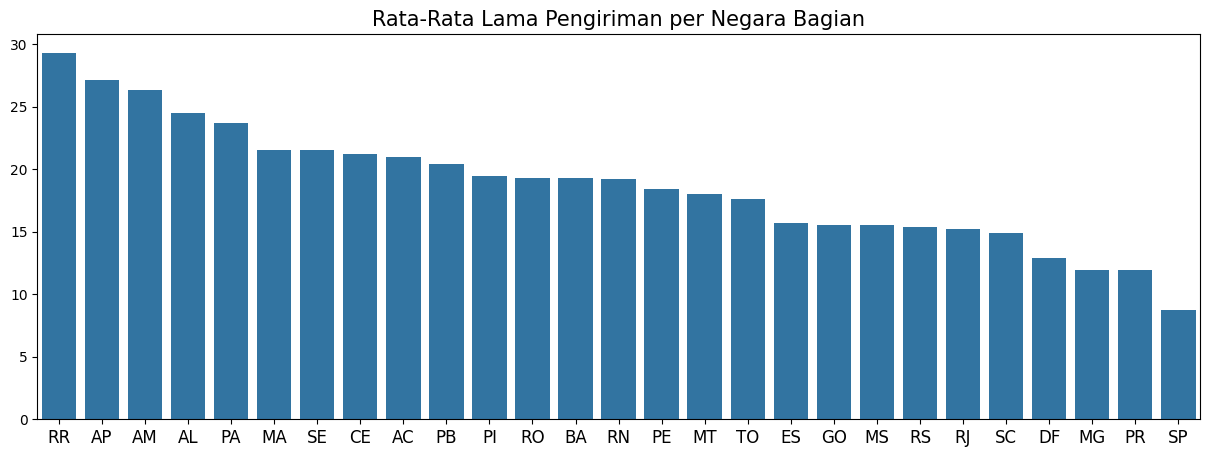

In [ ]:
plt.figure(figsize=(15, 5))

sns.barplot(
    y="delivery_time",
    x="customer_state",
    data=mean_delivered_orders.sort_values(by="delivery_time", ascending=False),
    errorbar=None  # Menghilangkan garis confidence interval
)
plt.title("Rata-Rata Lama Pengiriman per Negara Bagian", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Negara bagian manakah yang memiliki volume pesanan barang tertinggi dibandingkan dengan negara bagian lainnya?

In [ ]:
# Mengambil data yang statusnya selain unavailable dan canceled
fixed_orders = merged_df[~merged_df['order_status'].isin(['unavailable', 'canceled'])]


In [ ]:
fixed_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
state_fixed_orders = fixed_orders.groupby('customer_state')['order_id'].count().reset_index()
state_fixed_orders.columns = ['customer_state', 'sales_count']
state_fixed_orders

,customer_state,sales_count
0,AC,81
1,AL,411
2,AM,147
3,AP,68
4,BA,3344
5,CE,1323
6,DF,2121
7,ES,2018
8,GO,1998
9,MA,736


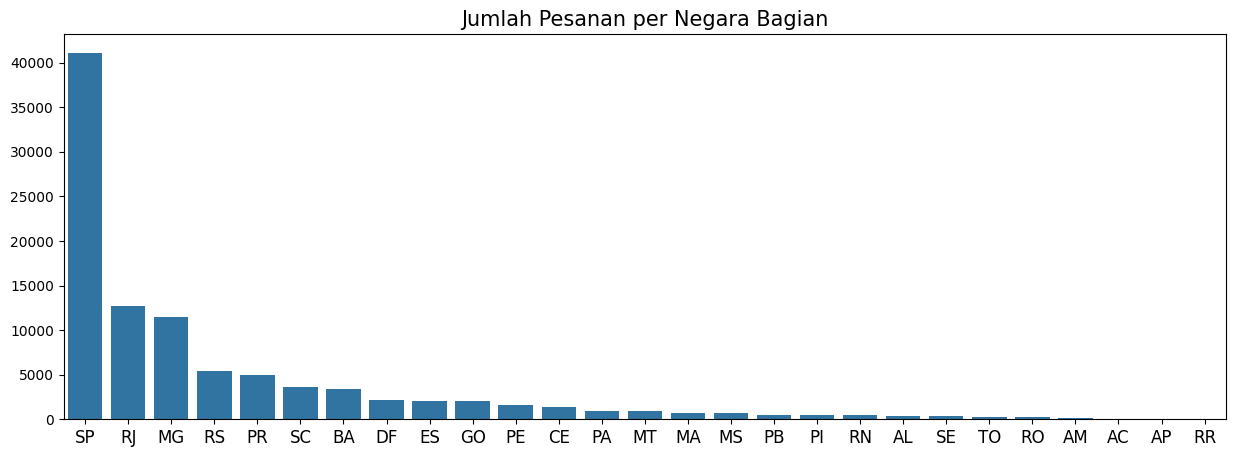

In [ ]:
plt.figure(figsize=(15, 5))

sns.barplot(
    y="sales_count",
    x="customer_state",
    data=state_fixed_orders.sort_values(by="sales_count", ascending=False),
    errorbar=None  # Menghilangkan garis confidence interval
)
plt.title("Jumlah Pesanan per Negara Bagian", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3: Berdasarkan data penjualan 2017, pada bulan apa permintaan paling banyak terjadi, diukur dari jumlah pesanannya?

In [ ]:
monthly_df = merged_df.copy()

In [ ]:
monthly_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
# Filter data untuk tahun 2017
monthly_df_2017 = monthly_df[monthly_df['order_purchase_timestamp'].dt.year == 2017]

# Menghitung jumlah pesanan setiap bulan
monthly_df_2017['order_month'] = monthly_df_2017['order_purchase_timestamp'].dt.to_period('M')
order_counts_per_month_2017 = monthly_df_2017.groupby('order_month').size().reset_index(name='order_count')

# Ubah kolom 'order_month' kembali ke format datetime
order_counts_per_month_2017['order_month'] = order_counts_per_month_2017['order_month'].dt.to_timestamp()

order_counts_per_month_2017

<ipython-input-131-4ff368a3d2e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_df_2017['order_month'] = monthly_df_2017['order_purchase_timestamp'].dt.to_period('M')


,order_month,order_count
0,2017-01-01,800
1,2017-02-01,1780
2,2017-03-01,2682
3,2017-04-01,2404
4,2017-05-01,3700
5,2017-06-01,3245
6,2017-07-01,4026
7,2017-08-01,4331
8,2017-09-01,4285
9,2017-10-01,4631


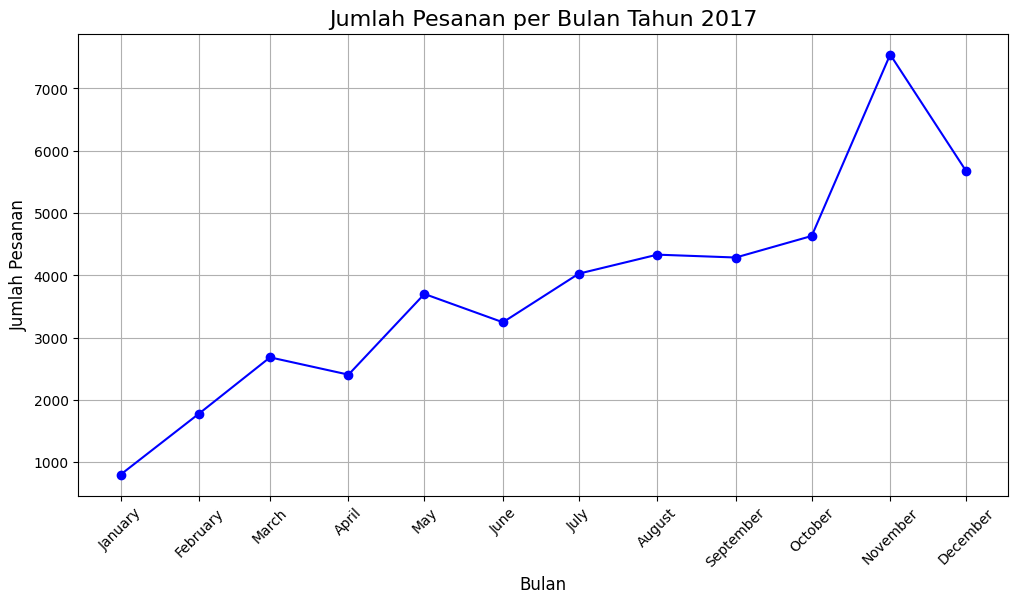

In [ ]:
# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(order_counts_per_month_2017['order_month'], order_counts_per_month_2017['order_count'], marker='o', color='b')
plt.title('Jumlah Pesanan per Bulan Tahun 2017', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.xticks(order_counts_per_month_2017['order_month'], calendar.month_name[1:13], rotation=45)
plt.grid(True)
plt.show()



```
# This is formatted as code
```

## Conclusion

### Berapakah rata-rata waktu pengiriman barang ke pelanggan untuk setiap negara bagian, mulai dari tanggal pembelian hingga tanggal penerimaan oleh pelanggan?

Dari data yang disajikan, dapat disimpulkan bahwa rata-rata waktu pengiriman barang ke pelanggan bervariasi di setiap negara bagian. Negara bagian dengan rata-rata waktu pengiriman terpendek adalah São Paulo (SP) dengan 8.74 hari, sementara negara bagian dengan rata-rata waktu pengiriman terpanjang adalah Roraima (RR) dengan 29.34 hari. Banyak faktor-faktor yang dapat menyebabkan perbedaan waktu pengiriman antar negara bagian tersebut, seperti lokasi geografis, infrastruktur logistik, dan kebijakan pengiriman yang berbeda.



### Negara bagian manakah yang memiliki volume pesanan barang tertinggi dibandingkan dengan negara bagian lainnya?
Dari data yang disajikan, dapat disimpulkan bahwa negara bagian dengan volume pesanan barang tertinggi adalah São Paulo (SP) dengan 41,127 pesanan. Diikuti oleh Rio de Janeiro (RJ) dengan 12,698 pesanan dan Paraná (PR) dengan 4,983 pesanan. Negara bagian dengan volume pesanan terendah adalah Roraima (RR) dengan 45 pesanan. Analisis ini dapat memberikan informasi yang berharga bagi perusahaan untuk mengarahkan strategi pemasaran dan distribusi mereka ke negara bagian dengan volume pesanan tertinggi untuk meningkatkan penjualan dan keuntungan. Selain itu, perusahaan bisa juga memasang strategi untuk mendongkrak pesanan pada negara bagian yang memiliki volume pesanan sedikit.

### Berdasarkan data penjualan 2017, pada bulan apa permintaan paling banyak terjadi, diukur dari jumlah pesanannya?
Berdasarkan data penjualan tahun 2017, permintaan paling tinggi terjadi pada bulan November, dengan jumlah pesanan mencapai 7,544. Bulan-bulan lain yang juga memiliki permintaan tinggi adalah bulan Oktober (4,631 pesanan) dan Desember (5,673 pesanan). Sedangkan permintaan paling sedikit jatuh pada bulan Januari (800 pesanan). Hal ini menunjukkan bahwa pada kuartal terakhir tahun 2017, terjadi peningkatan signifikan dalam permintaan barang, mungkin terkait dengan musim liburan dan akhir tahun di mana konsumen cenderung melakukan lebih banyak pembelian. Analisis ini dapat membantu perusahaan untuk mempersiapkan stok dan strategi pemasaran yang tepat untuk menghadapi lonjakan permintaan pada bulan-bulan tersebut di tahun-tahun berikutnya.